In [35]:
import matplotlib.pyplot as plt
import rtlsdr as rtlsdr
import numpy as np

sdr = rtlsdr.RtlSdr()

# configure device
sdr.sample_rate = 1.2e6
sdr.center_freq = 97.71e6
sdr.gain = 40

N_dat = 256
vec_length = 4096*4

inp_data = sdr.read_samples(N_dat*vec_length)
sdr.close()

In [36]:
N_taps = 96

sinc_sample_locations = np.arange(-np.pi*N_taps/2.0, np.pi*N_taps/2.0, np.pi/vec_length)
sinc = np.sinc(sinc_sample_locations/np.pi)
custom_window = sinc*np.hamming(N_taps*vec_length)

pow_spec_fft = np.zeros(int(vec_length))
pow_spec_pfb = np.zeros(int(vec_length))

In [37]:
for i in range(N_dat-N_taps):

    sig_full = np.zeros(vec_length, dtype=np.complex64)
    for tap in range(N_taps):
        sig_full = sig_full + inp_data[(i+tap)*vec_length:(i+tap+1)*vec_length]*custom_window[tap*vec_length:(tap+1)*vec_length]

    pow_spec_pfb = pow_spec_pfb + (np.abs(np.fft.fftshift(np.fft.fft(sig_full))))**2
    pow_spec_fft = pow_spec_fft + (np.abs(np.fft.fftshift(np.fft.fft(inp_data[(i+0)*vec_length:(i+1)*vec_length]))))**2


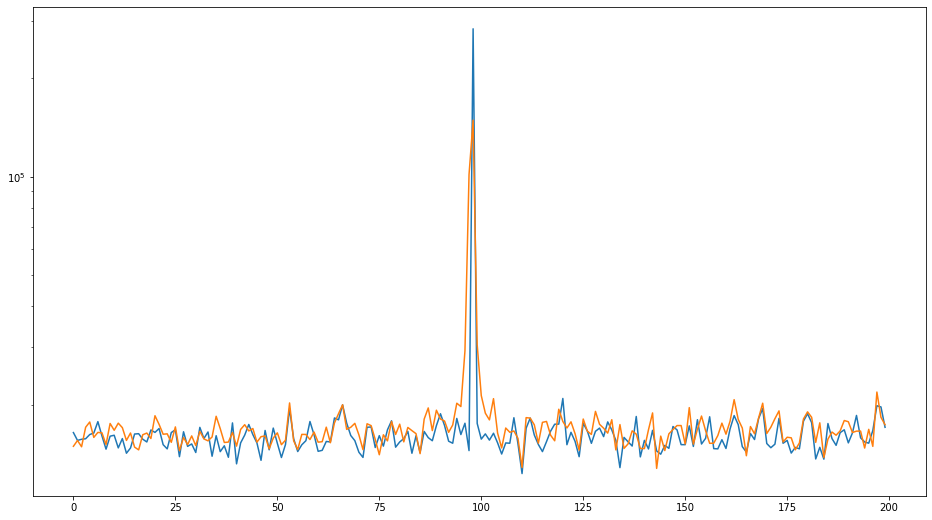

In [41]:
plt.figure(figsize=(16,9))
# plt.semilogy(pow_spec_pfb[2500:3000])
# plt.semilogy(10*pow_spec_fft[2500:3000])

plt.semilogy(pow_spec_pfb[12600:12800])
plt.semilogy(pow_spec_fft[12600:12800])